# regression ultimate code

In [1]:
import numpy as np
import argparse

import os
import math
from math import sin

import json

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
matplotlib.rc( 'savefig', facecolor = 'white' )
from matplotlib import pyplot
%matplotlib inline

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets, models
from torchsummary import summary
torch.manual_seed(0)

i_seed = 0

import sys
sys.path.append('../') # add this line so Data and data are visible in this file
sys.path.append('../../') # add this line so Data and data are visible in this file
sys.path.append('../PatchWand/') # add this line so Data and data are visible in this file

# from PatchWand import *
from plotting_tools import *
from setting import *
# from models import *
# from models_CNN import *
from evaluate import *

from stage3_preprocess import *
# from training_util import *
# from dataset_util import *
from dataIO import *
from stage4_regression import *

from importlib import reload
%load_ext autoreload
%autoreload 2

In [2]:
parser = argparse.ArgumentParser(description='SpO2_estimate')
parser.add_argument('--input_folder', metavar='input_folder', help='input_folder',
                    default='../')
parser.add_argument('--output_folder', metavar='output_folder', help='output_folder',
                    default='../')
parser.add_argument('--training_params_file', metavar='training_params_file', help='training_params_file',
                    default='training_params_list.json')


# checklist 3: comment first line, uncomment second line
args = parser.parse_args(['--input_folder', '../../data/stage4/', 
                          '--output_folder', '../../data/stage5_VO2/',
#                           '--training_params_file', 'training_params_ML.json',
#                           '--training_params_file', 'training_params_baseline.json',
                         ])
# args = parser.parse_args()
print(args)

Namespace(input_folder='../../data/stage4/', output_folder='../../data/stage5_VO2/', training_params_file='training_params_list.json')


In [3]:
inputdir = args.input_folder
outputdir = args.output_folder

if not os.path.exists(outputdir):
    os.makedirs(outputdir)

    

# get training params and dataloaders

In [4]:
# i_rep = 0
# aux_weight = 0.1
repN = 5
aux_weights = [0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.45, 0.495, 0.4995, 0.5]
# aux_weights = [0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5]
# aux_weights = [ 0, 0.001,0.01, 0.1,   0.2, 0.3, 0.4]

# aux_weights = [0.001, 0.4, 0.45, 0.495, 0.4995]
# aux_weights = [0.001, 0.01, 0.1, 0.4995]
target_name = 'VO2_cosmedweighted'


In [5]:
# path_str = inputdir + 'DFR_DL1111/exp_weights(backup)/rep{}/auxweight{}-fixed-4feat-HR_patch+RR_cosmed-cardioresp_multiverse-CardioRespXGBRegression-ch=1|spec=1-4dem/numeric_results/df_performance_val_{}.csv'
path_str = inputdir + 'DFR_DL1111/exp_weights/rep{}/auxweight{}-fixed-4feat-HR_patch+RR_cosmed-cardioresp_multiverse-CardioRespRegression-ch=1|spec=1-4dem/numeric_results/df_performance_val_{}.csv'


In [6]:
# path_str

In [7]:
# df

In [8]:
df_performance_merged = pd.DataFrame()

for i_rep in range(repN):
    for aux_weight in aux_weights:
        
        print(aux_weight, i_rep)


        df_dir = path_str.format(i_rep, aux_weight, target_name)
        df = pd.read_csv(df_dir)

        if df.shape[0]!=17:
            print('\t', df.shape)
        df['i_rep'] = i_rep
        df['aux_weight'] = aux_weight

        df_performance_merged = df_performance_merged.append(df)

0 0
0.001 0
0.01 0
0.1 0
0.2 0
0.3 0
0.4 0
0.45 0
0.495 0
0.4995 0
0.5 0
0 1
0.001 1
0.01 1
0.1 1
0.2 1
0.3 1
0.4 1
0.45 1
0.495 1
0.4995 1
0.5 1
0 2
0.001 2
0.01 2
0.1 2
0.2 2
0.3 2
0.4 2
0.45 2
0.495 2
0.4995 2
0.5 2
0 3
0.001 3
0.01 3
0.1 3
0.2 3
0.3 3
0.4 3
0.45 3
0.495 3
0.4995 3
0.5 3
0 4
0.001 4
0.01 4
0.1 4
0.2 4
0.3 4
0.4 4
0.45 4
0.495 4
0.4995 4
0.5 4


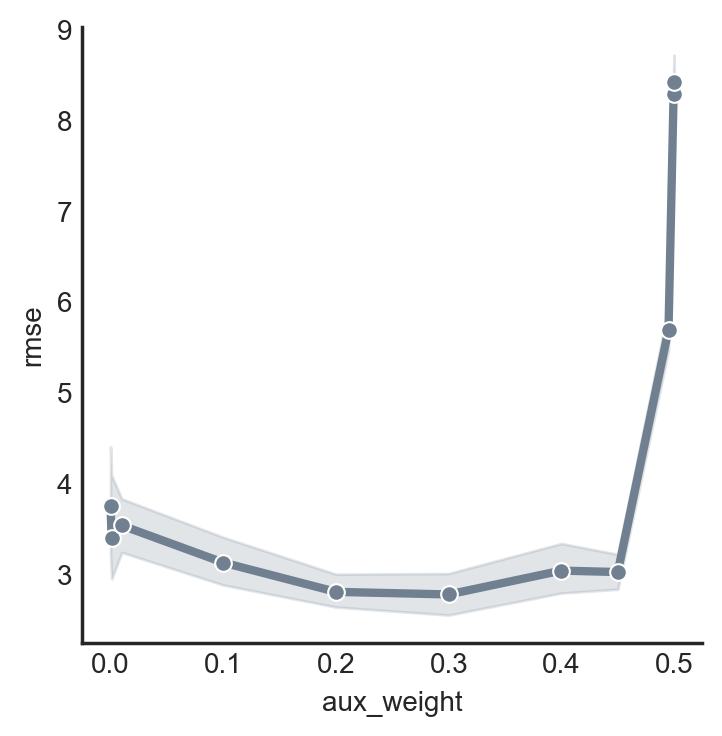

In [9]:
metric_name = 'PCC'
metric_name = 'PCC'
metric_name = 'rmse'

df_table = df_performance_merged.groupby(['aux_weight', 'i_rep']).mean()[[metric_name]]

fig, ax = plt.subplots(1,1,figsize=(4,4), dpi=200)

# df_performance
sns.lineplot(x='aux_weight', y=metric_name, data=df_performance_merged, ax=ax, marker='o', linewidth=3, color='slategray')
ax_no_top_right(ax)
# sns.lineplot(data=may_flights, x="year", y="passengers")

# ax.set_xscale('log')

# Show the plot
plt.show()

In [10]:
# display(df_table)

df_table_mean = df_table.reset_index(['aux_weight', 'i_rep']).groupby(['aux_weight']).mean()[[metric_name]]
df_table_std = df_table.reset_index(['aux_weight', 'i_rep']).groupby(['aux_weight']).std()[[metric_name]]

df_table_mean =  df_table_mean.reset_index(['aux_weight'])
df_table_std =  df_table_std.reset_index(['aux_weight'])

display(df_table_mean)
display(df_table_std)


,aux_weight,rmse
0,0.0000,3.753063
1,0.0010,3.404285
2,0.0100,3.538533
3,0.1000,3.130237
4,0.2000,2.807706
5,0.3000,2.779402
6,0.4000,3.041795
7,0.4500,3.025934
8,0.4950,5.694982
9,0.4995,8.284251


,aux_weight,rmse
0,0.0000,0.671577
1,0.0010,0.727387
2,0.0100,0.326334
3,0.1000,0.178802
4,0.2000,0.125190
5,0.3000,0.156834
6,0.4000,0.181756
7,0.4500,0.134699
8,0.4950,0.020936
9,0.4995,0.001001


In [11]:
df_table_merged = pd.DataFrame()

for aux_weight in df_table_mean['aux_weight'].unique():
    # print(aux_task)
    
    merged_mean = df_table_mean[df_table_mean['aux_weight']==aux_weight][metric_name].values[0]
    merged_std = df_table_std[df_table_mean['aux_weight']==aux_weight][metric_name].values[0]
    
    performance_dict = {
        'aux_weight': aux_weight,
        'merged_stats': '{:.2f}±{:.2f}'.format(merged_mean, merged_std),
    }
    
    df_table_merged = df_table_merged.append(pd.DataFrame(performance_dict, index=[0]))
    
df_table_merged.set_index(['aux_weight'])


,merged_stats
aux_weight,
0.0000,3.75±0.67
0.0010,3.40±0.73
0.0100,3.54±0.33
0.1000,3.13±0.18
0.2000,2.81±0.13
0.3000,2.78±0.16
0.4000,3.04±0.18
0.4500,3.03±0.13
0.4950,5.69±0.02
